In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import numpy as np
from math import *
from scipy.signal import argrelextrema

import networkx as nx

import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 4.0})

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [132]:
def readEdges(filename):
    edges=np.loadtxt(filename)
    edges.sort()
    edges.sort(axis=0)
    return edges

def readTrigs(filename):
    trigs=np.loadtxt(filename)
    trigs.sort()
    trigs.sort(axis=0)
    return trigs

In [133]:
def B1fromEdges(n, edges):
    B1=np.zeros((n, edges.shape[0]))

    for i in range(edges.shape[0]):
        B1[int(edges[i, 0]),i]=-1
        B1[int(edges[i, 1]),i]=1
    return B1

def B2fromTrig(n, edges, trigs):
    B2=np.zeros((len(edges), trigs.shape[0]))

    for i in range(trigs.shape[0]):
        B2[np.where((edges==np.array([trigs[i, 0], trigs[i, 1]])).all(axis=1))[0][0] ,i]=1
        B2[np.where((edges==np.array([trigs[i, 0], trigs[i, 2]])).all(axis=1))[0][0] ,i]=1
        B2[np.where((edges==np.array([trigs[i, 1], trigs[i, 2]])).all(axis=1))[0][0] ,i]=-1
    return B2

In [135]:
n=7
edges=readEdges('6.edges')
trigs=readTrigs('6.trigs')

In [136]:
B1=B1fromEdges(n, edges)
B2=B2fromTrig(n, edges, trigs)

In [137]:
def getRandomWeights(edges):
    return np.random.uniform(size=(edges.shape[0]))

In [363]:
w=getRandomWeights(edges)
w=np.array([1, 1, 1, 1, 1, 1, 1, 0.25, 1, 1])

In [364]:
def getAdjB1(B1):
    return np.diag(np.diag(B1.dot(B1.T)))-B1.dot(B1.T)

In [365]:
A=getAdjB1(B1)
G = nx.from_numpy_matrix(np.array(A))  
pos = nx.spring_layout(G)

In [366]:
def getPosFromB1(B1):
    A=getAdjB1(B1)
    G = nx.from_numpy_matrix(np.array(A))  
    pos = nx.spring_layout(G)
    return np.array(list(pos.values()))

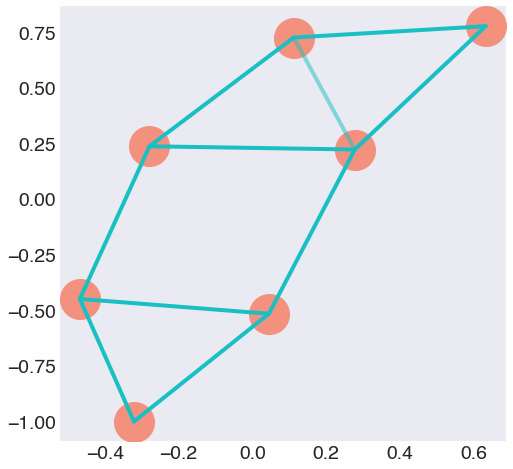

In [367]:
points=getPosFromB1(B1)
plt.figure(figsize=(8,8))
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', color=colors[4], markersize=40)

for i in range(edges.shape[0]):
    plt.plot(points[edges[i].astype(int), 0], points[edges[i].astype(int), 1], color=colors[3], alpha=np.sqrt(w[i]))
plt.grid(False)

([], [])

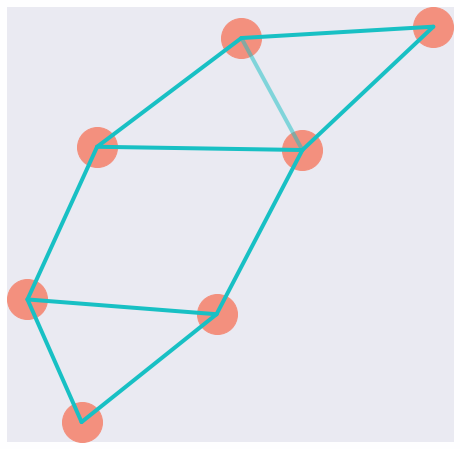

In [368]:
plt.figure(figsize=(8,8))
plt.plot(points[:,0], points[:,1], 'o', color=colors[4], markersize=40)

for i in range(edges.shape[0]):
    plt.plot(points[edges[i].astype(int), 0], points[edges[i].astype(int), 1], color=colors[3], alpha=np.sqrt(w[i]))
plt.grid(False)
plt.xticks([], [])
plt.yticks([], [])

In [285]:
def simpleDrawB1(B1, w, eps=0, e=0):
    points=getPosFromB1(B1)
    plt.figure(figsize=(8,8))
    plt.plot(points[:,0], points[:,1], 'o', color=colors[4], markersize=40)

    for i in range(edges.shape[0]):
        plt.plot(points[edges[i].astype(int), 0], points[edges[i].astype(int), 1], color=colors[3], linewidth=8*((np.sqrt(w)+eps*e)**2)[i])
    plt.grid(False)
    plt.xticks([], [])
    plt.yticks([], [])

In [369]:
def HodgeLW_fr(B1, B2, w, e=0, eps=0):
    W=np.diag(np.sqrt(w)+eps*e)
    Dt=1./3.*np.diag(np.abs(B2).T.dot(np.diag(W.dot(W))))
    L1=W.dot(B1.T.dot(B1.dot(W)))+B2.dot(Dt.dot(B2.T))
    return L1

In [370]:
L1=HodgeLW_fr(B1, B2, w)
L1

array([[ 3.  ,  2.  , -2.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 2.  ,  3.  ,  0.  ,  0.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [-2.  ,  0.  ,  3.  ,  1.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [-1.  ,  0.  ,  1.  ,  2.  ,  0.  , -1.  , -1.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  , -1.  , -1.  ,  0.  ,  2.  ,  1.  ,  0.  , -0.5 , -1.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  , -1.  ,  1.  ,  2.75,  1.75, -1.25, -1.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  , -1.  ,  0.  ,  1.75,  2.75, -0.25,  0.  ,
        -1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.5 , -1.25, -0.25,  2.  ,  1.25,
        -1.25],
       [ 0.  ,  0.  ,  0.  ,  0.  , -1.  , -1.  ,  0.  ,  1.25,  2.75,
         0.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -1.  , -1.25,  0.25,
         2.75]])

$$
F(L_1(W))=\sum_{i=1}^{k+1} \lambda_i^2=\sum_{i=1}^{k+1} (x_i^T L_1 x_i)^2
$$

In [371]:
def getL1k(L1, thr=1e-8):
    return np.sum(np.abs(np.linalg.eig(L1)[0])<thr)

In [372]:
k=getL1k(L1)
k

1

In [377]:
def getFk_l2(L1, k, thr=1e-8):
    #k=getL1k(L1, thr=thr)
    vals, vecs=np.linalg.eig(L1)
    idx = vals.argsort() 
    vals = vals[idx]
    vecs = vecs[:,idx]
    
    ans=0
    for i in range(k+1):
        ans+=(vecs[:, i].T.dot(L1.dot(vecs[:, i])))**2
    
    return np.sqrt(np.sum(np.power(vals[:k+1], 2))), np.sqrt(ans)

In [378]:
getFk_l2(L1, 1)

(0.18530878538559206, 0.1853087853855917)

In [379]:
eps=0.5
e=np.random.uniform(size=w.shape[0])
e=e/np.linalg.norm(e)

In [380]:
def Sym(A):
    return 0.5*(A+A.T)

In [381]:
L1_E=HodgeLW_fr(B1, B2, w, e, eps)
vals, vecs=np.linalg.eig(L1_E)
idx = vals.argsort()
vals = vals[idx]
vecs = vecs[:,idx]

def getG_i(i, B1, B2, L1_E, vecs, w, e, eps):
    W=np.diag(np.sqrt(w)+eps*e)
    x=vecs[:, i].reshape(-1, 1)
    Gi=2*Sym(x.dot(x.T.dot(W.dot(B1.T.dot(B1)))))+2./3.*np.diag(np.diag(B2.T.dot(x.dot(x.T.dot(B2)))).T.dot(np.abs(B2).T.dot(W)))
    return x.T.dot(L1_E.dot(x))*Gi

In [382]:
getG_i(0, B1, B2, L1_E, vecs, w, e, eps)

array([[-2.03205213e-32,  7.64015611e-33,  7.86120587e-33,
         1.16559812e-32,  3.50955368e-32,  2.38413971e-33,
        -3.36209327e-33, -2.39002980e-32, -2.12761443e-32,
        -1.51301735e-32],
       [ 7.64015611e-33,  6.91898490e-33, -7.42321946e-33,
        -2.62532973e-32, -2.42600431e-32, -1.57515566e-32,
         3.57301423e-33,  1.23515792e-32,  2.91229601e-32,
         9.32082009e-33],
       [ 7.86120587e-33, -7.42321946e-33, -1.00280296e-33,
         5.46967766e-33, -8.52861482e-33,  5.85556816e-33,
         2.47177375e-34,  7.71052275e-33, -1.40702797e-33,
         4.19604428e-33],
       [ 1.16559812e-32, -2.62532973e-32,  5.46967766e-33,
         4.21658069e-32,  4.58369665e-33,  3.18136195e-32,
        -3.22880721e-33,  6.19204876e-33, -3.49783084e-32,
         5.65842266e-34],
       [ 3.50955368e-32, -2.42600431e-32, -8.52861482e-33,
         4.58369665e-33, -4.81099489e-32,  1.26691350e-32,
         3.19750902e-33,  3.74750576e-32,  1.28757960e-32,
         2.

In [383]:
def scal(A, B):
    return np.trace(A.T.dot(B))

In [384]:
def getDotE(B1, B2, w, e, eps, k, thr=1e-8):
    mask=(np.abs(w+eps*e)<thr)
    matmask=np.diag(np.logical_not((np.abs(w+eps*e)<1e-8)))
    E=np.diag(e)
    PE=np.multiply(E, matmask)
    
    L1_E=HodgeLW_fr(B1, B2, w, e, eps)
    vals, vecs=np.linalg.eig(L1_E)
    idx = vals.argsort()
    vals = vals[idx]
    vecs = vecs[:,idx]
    #k=np.sum(np.abs(vals)<thr)

    GE=np.zeros(L1_E.shape)
    for i in range(k+1):
        GE+=getG_i(i, B1, B2, L1_E, vecs, w, e, eps)
    
    kappa=scal(-GE, PE)/scal(PE, PE)
    PGE=np.multiply(GE, matmask)
    dE=-PGE-kappa*PE
    return dE

In [385]:
matmask=np.diag(np.logical_not((np.abs(w+eps*e)<1e-8)))

In [386]:
e=np.random.uniform(low=-1., high=1., size=w.shape[0])
e=e/np.linalg.norm(e)
#e=np.array([0,0,0,0,0,0,0,1,0,0])
eps=1.

track=[]
h=1e-3
t_cur=0
log=[]
for i in range(500000):
    h=1e-3
    e0=e
    while True:
        e=e0
        dE=getDotE(B1, B2, w, e, eps, 1)
        E1=np.diag(e)+h*dE
        e=np.diag(E1)
        if np.sum(np.sqrt(w)+eps*e<0)>0:
            h=h/2
        else:
            break
    L1_E=HodgeLW_fr(B1, B2, w, e, eps)
    log.append(np.sort(np.linalg.eig(L1_E)[0]))
    track.append(getFk_l2(L1_E, 1)[0])
    dE=getDotE(B1, B2, w, e, eps, 1)
    
    if i % 10000 ==0:
        print('time: ', t_cur, ' ||   E_norm:', scal(E1, E1), ',    dE-orth:', scal(dE, E1), getFk_l2(L1_E, 1)[0], np.sum((np.sort(np.linalg.eig(L1_E)[0])[:2])**2))
    t_cur+=h
    #print(scal(E1, dE), end=' ')
    #print(track[-1])

time:  0  ||   E_norm: 1.0000000100955084 ,    dE-orth: -3.469446951953614e-18 0.2011694934544082 0.04046916509670319
time:  9.999999999999897  ||   E_norm: 1.0000189405596902 ,    dE-orth: -2.168404344971009e-18 0.051116811473767135 0.002612928415244651
time:  20.00000000000146  ||   E_norm: 1.0000197523264647 ,    dE-orth: -1.0842021724855044e-18 0.031455723548691854 0.0009894625439717272
time:  30.00000000001368  ||   E_norm: 1.0000199638359943 ,    dE-orth: -3.2526065174565133e-19 0.02380028637941327 0.0005664536317420847
time:  39.99999999999748  ||   E_norm: 1.0000200532601187 ,    dE-orth: 2.168404344971009e-19 0.01968777234440268 0.000387608379885027
time:  49.99999999997417  ||   E_norm: 1.0000201007576133 ,    dE-orth: 1.6263032587282567e-19 0.017105981717352135 0.00029261461051438553
time:  59.999999999950866  ||   E_norm: 1.000020129594354 ,    dE-orth: 3.7947076036992655e-19 0.015327809167531162 0.00023494173387625234
time:  69.99999999997019  ||   E_norm: 1.00002014871174

In [387]:
eps

1.0

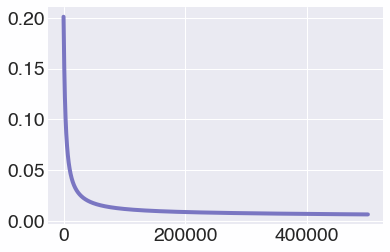

In [388]:
plt.plot(track)

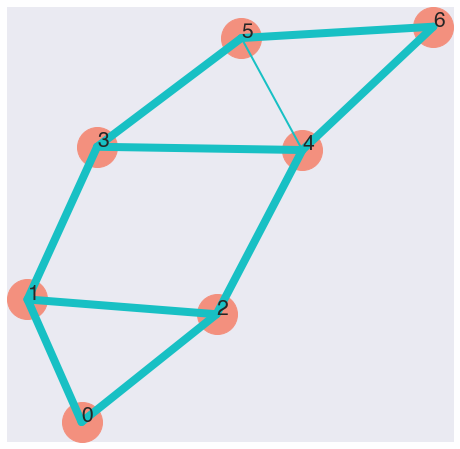

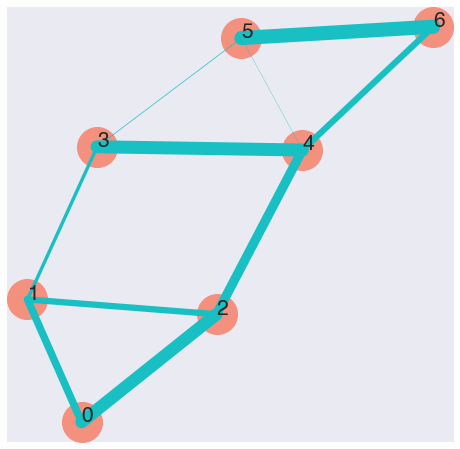

In [389]:
simpleDrawB1(B1, w, points, e=0, eps=0)
simpleDrawB1(B1, w, points, e, eps)

In [390]:
np.sqrt(w)+eps*e, np.sqrt(w)

(array([0.96681254, 1.24877484, 0.88688902, 0.64995395, 1.08006403,
        1.27482964, 0.29066726, 0.19471793, 0.88133766, 1.33065263]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ]))

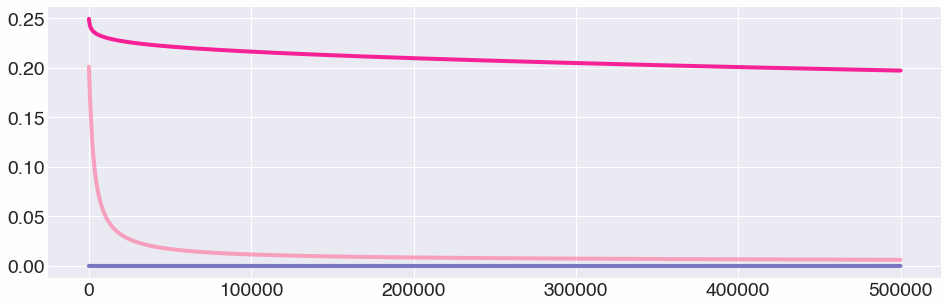

In [391]:
log=np.array(log)

plt.figure(figsize=(16, 5))
plt.plot(log[:, :3])

In [351]:
getL1k(L1_E)
np.linalg.eig(L1_E)[0]

array([ 6.37180129e+00,  4.92549874e+00,  3.15280449e+00,  2.88115436e+00,
        2.37430205e+00, -8.88413572e-16,  1.93850757e-02,  2.80974713e-01,
        1.07235256e+00,  6.91000102e-01])

In [335]:
points=getPosFromB1(B1)


In [336]:
def simpleDrawB1(B1, w, points, eps=0, e=0):
    
    plt.figure(figsize=(8,8))
    plt.plot(points[:,0], points[:,1], 'o', color=colors[4], markersize=40)
    for i in range(points.shape[0]):
        plt.annotate(str(i), (points[i,0], points[i,1]))
    for i in range(edges.shape[0]):
        plt.plot(points[edges[i].astype(int), 0], points[edges[i].astype(int), 1], color=colors[3], linewidth=8*((np.sqrt(w)+eps*e)**2)[i])
    plt.grid(False)
    plt.xticks([], [])
    plt.yticks([], [])

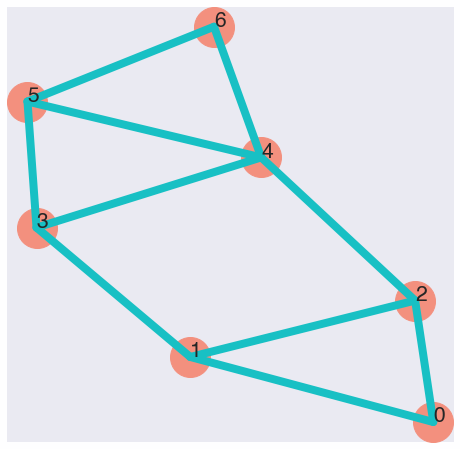

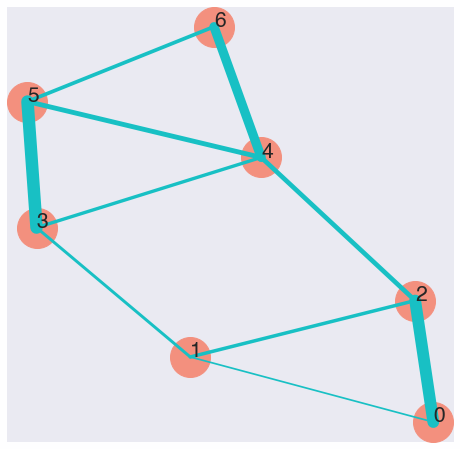

In [337]:
simpleDrawB1(B1, w, points, e=0, eps=0)
simpleDrawB1(B1, w, points, e, eps)

In [289]:
epses=np.hstack([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6], np.arange(0.7, 0.71 , 0.001), [0.8]])
ans=[]
for eps in epses:
    #e=np.random.uniform(size=w.shape[0])
    #e=e/np.linalg.norm(e)
    e=np.array([1, 0, 0, 0, 0, 0, 0, 0,0,0])
    track=[]
    h=1e-3
    t_cur=0
    for i in range(10000):
        h=1e-3
        e0=e
        while True:
            e=e0
            dE=getDotE(B1, B2, w, e, eps, 1)
            E1=np.diag(e)+h*dE
            e=np.diag(E1)
            if np.sum(np.sqrt(w)+eps*e<0)>0:
                h=h/2
            else:
                break
        L1_E=HodgeLW_fr(B1, B2, w, e, eps)
        track.append(sqrt(getFk_l2(L1_E, 1)[0]))
        #track.append(np.sum((np.sort(np.linalg.eig(L1_E)[0])[:2])**2))
        dE=getDotE(B1, B2, w, e, eps, 1)
    ans.append(track[-1])
    #print(np.linalg.eig(L1_E)[0], )

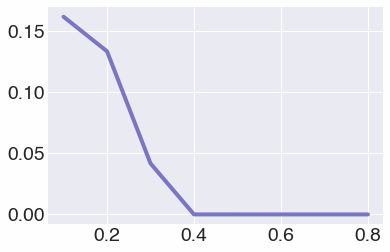

In [290]:
plt.plot(epses, ans)

In [291]:
ans[-1]

1.0200135035568666e-14

In [292]:
np.sqrt(w)+eps*e

array([1.72778562, 0.99595533, 0.99602147, 0.99906208, 0.96771224,
       0.97411972, 0.85596354, 0.82389728, 0.88421906, 1.20857357])

In [293]:
np.sqrt(w)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [294]:
L1_E=HodgeLW_fr(B1, B2, w, e, eps)
np.linalg.eig(L1_E)[0]

array([ 1.49341927e+01,  6.35631788e+00,  4.18733472e+00,  3.73140754e+00,
        2.88601596e+00,  1.58343674e+00,  7.35875640e-01,  5.62488979e-01,
       -2.00194551e-16,  1.01981703e-14])